In [21]:
import pandas as pd

# 读取CSV文件
file1 = pd.read_csv('E:\\ricePhenoExt\python-macduff-colorchecker-detector\color_data\BabelColor_Avg_2006.csv', header=None, names=['R', 'G', 'B'], na_values=[' ', 'NaN'])
file2 = pd.read_csv('E:\\ricePhenoExt\python-macduff-colorchecker-detector\\r1l.csv', header=None, names=['R', 'G', 'B'], na_values=[' ', 'NaN'])

# 清理数据
file1 = file1.dropna().astype(int)
file2 = file2.dropna().astype(int)


# 查看读取的数据
print("File 1:")
print(file1.head())

print("\nFile 2:")
print(file2.head())

File 1:
     R    G    B
0  115   81   67
1  196  149  129
2   93  123  157
3   90  108   65
4  130  129  176

File 2:
     R    G    B
0   64   46   37
1  168  110   84
2   78   86  105
3   59   57   33
4  101   97  122


# 比较二者的差异

In [23]:
import numpy as np

# 计算两个文件中对应颜色的欧几里得距离
def calculate_color_difference(file1, file2):
    differences = []
    for i in range(len(file1)):
        color1 = file1.iloc[i]
        color2 = file2.iloc[i]
        diff = np.linalg.norm(color1 - color2)  # 计算欧几里得距离
        differences.append(diff)
    return differences

differences = calculate_color_difference(file1, file2)

# 输出差异
for i, diff in enumerate(differences):
    print(f"Color {i+1}: Difference = {diff:.2f}")

Color 1: Difference = 68.75
Color 2: Difference = 65.80
Color 3: Difference = 65.56
Color 4: Difference = 67.72
Color 5: Difference = 69.14
Color 6: Difference = 83.89
Color 7: Difference = 37.58
Color 8: Difference = 35.86
Color 9: Difference = 42.43
Color 10: Difference = 63.25
Color 11: Difference = 56.19
Color 12: Difference = 34.55
Color 13: Difference = 50.84
Color 14: Difference = 59.25
Color 15: Difference = 51.61
Color 16: Difference = 42.15
Color 17: Difference = 36.99
Color 18: Difference = 96.09
Color 19: Difference = 20.62
Color 20: Difference = 84.67
Color 21: Difference = 114.18
Color 22: Difference = 122.92
Color 23: Difference = 86.84
Color 24: Difference = 52.87


# 二维可视化差异

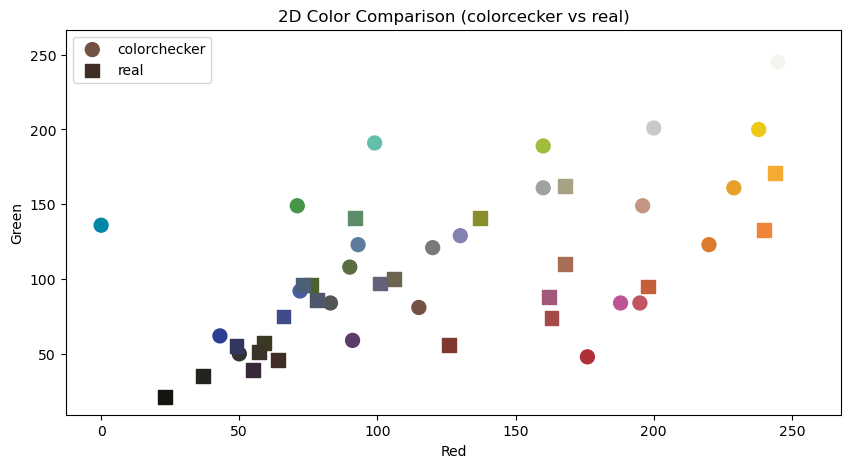

In [26]:
import matplotlib.pyplot as plt

# 二维可视化
def plot_2d_colors(file1, file2):
    plt.figure(figsize=(10, 5))
    
    # 绘制file1的颜色
    plt.scatter(file1['R'], file1['G'], c=file1.apply(lambda x: tuple(x/255), axis=1), label='colorchecker', s=100,marker="o")
    
    # 绘制file2的颜色
    plt.scatter(file2['R'], file2['G'], c=file2.apply(lambda x: tuple(x/255), axis=1), label='real', s=100, marker="s")
    
    plt.xlabel('Red')
    plt.ylabel('Green')
    plt.title('2D Color Comparison (colorcecker vs real)')
    plt.legend()
    plt.show()

plot_2d_colors(file1, file2)

# 三维可视化

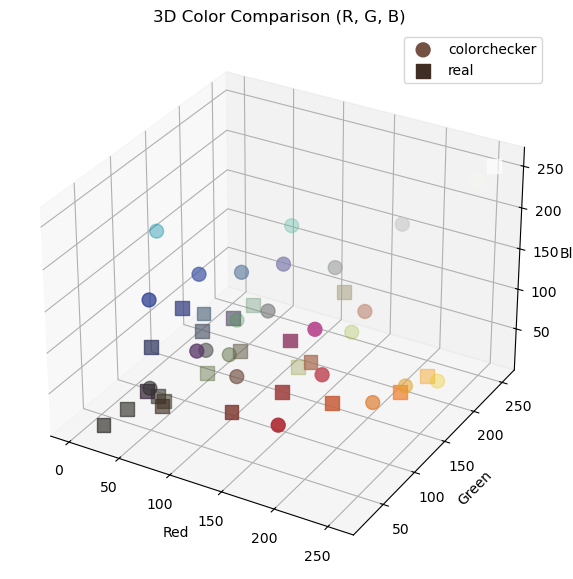

In [28]:
from mpl_toolkits.mplot3d import Axes3D

# 三维可视化
def plot_3d_colors(file1, file2):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # 绘制file1的颜色
    ax.scatter(file1['R'], file1['G'], file1['B'], c=file1.apply(lambda x: tuple(x/255), axis=1), label='colorchecker', s=100,marker='o')
    
    # 绘制file2的颜色
    ax.scatter(file2['R'], file2['G'], file2['B'], c=file2.apply(lambda x: tuple(x/255), axis=1), label='real', s=100, marker='s')
    
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title('3D Color Comparison (R, G, B)')
    ax.legend()
    plt.show()

plot_3d_colors(file1, file2)

# 最小二乘法拟合色彩校正函数

In [29]:
from sklearn.linear_model import LinearRegression

# 假设 file1 和 file2 已经读取并清理
# file1 和 file2 是 DataFrame，包含 R, G, B 三列

# 提取 R, G, B 数据
X = file2[['R', 'G', 'B']].values  # file2 的数据作为输入
y_R = file1['R'].values  # file1 的 R 通道作为目标
y_G = file1['G'].values  # file1 的 G 通道作为目标
y_B = file1['B'].values  # file1 的 B 通道作为目标

# 创建线性回归模型
model_R = LinearRegression()
model_G = LinearRegression()
model_B = LinearRegression()

# 拟合 R 通道
model_R.fit(X, y_R)
# 拟合 G 通道
model_G.fit(X, y_G)
# 拟合 B 通道
model_B.fit(X, y_B)

LinearRegression()

In [30]:
# 输出拟合结果
print("R 通道拟合函数:")
print(f"系数: {model_R.coef_}, 截距: {model_R.intercept_}")

print("\nG 通道拟合函数:")
print(f"系数: {model_G.coef_}, 截距: {model_G.intercept_}")

print("\nB 通道拟合函数:")
print(f"系数: {model_B.coef_}, 截距: {model_B.intercept_}")

R 通道拟合函数:
系数: [ 1.08605151 -0.24741518 -0.09851856], 截距: 40.93471785653311

G 通道拟合函数:
系数: [-0.29621621  1.47334444 -0.35285587], 截距: 49.45864664496682

B 通道拟合函数:
系数: [-0.38806628  0.09661767  1.11014077], 截距: 60.686197676844685


In [31]:
# 使用拟合函数预测 file2 到 file1 的映射值
file2_mapped_R = model_R.predict(X)
file2_mapped_G = model_G.predict(X)
file2_mapped_B = model_B.predict(X)

# 将映射结果保存到新的 DataFrame
file2_mapped = pd.DataFrame({
    'R': file2_mapped_R,
    'G': file2_mapped_G,
    'B': file2_mapped_B
})

print("\nFile2 映射到 File1 的结果:")
print(file2_mapped)


File2 映射到 File1 的结果:
             R           G           B
0    95.415729   85.218986   81.369577
1   187.900142  132.122318   99.370831
2    94.024581  116.011537  155.290928
3    87.657979  104.318279   79.932140
4   114.607383  119.406803  166.300591
5    95.719985  193.251310  154.061831
6   226.852916  110.662773   56.305777
7    80.560936   92.067955  194.409433
8   192.559053   84.797270   84.511237
9    85.402801   70.514403  106.388665
10  150.503417  201.092933   69.990402
11  262.966784  153.855925   44.788605
12   70.987106   81.750977  154.668576
13   95.190921  152.155911   91.534932
14  159.390104   78.411322   68.266911
15  258.500324  210.775284   40.246967
16  182.886224   87.371803  143.979270
17   84.839430  127.638937  172.629266
18  229.664747  259.648097  269.452697
19  170.207143  191.446291  158.791847
20  123.334656  136.812846  119.134341
21   86.083700   92.894942   90.119833
22   69.503535   79.480026   83.013587
23   59.240405   68.293069   70.441756


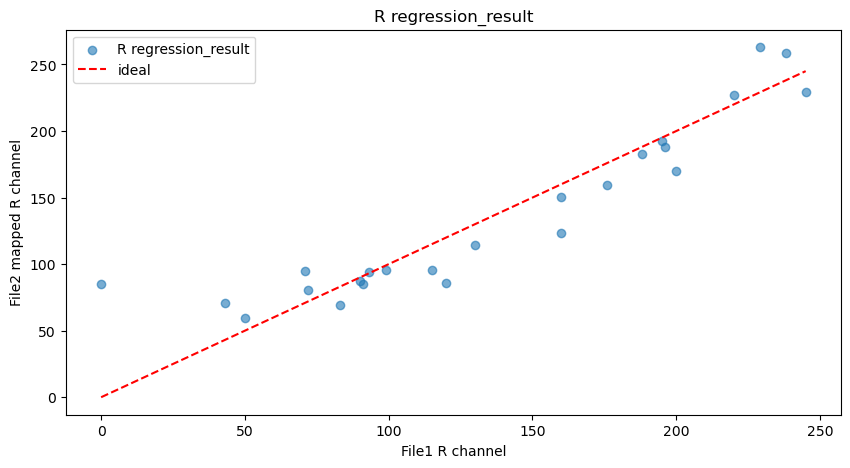

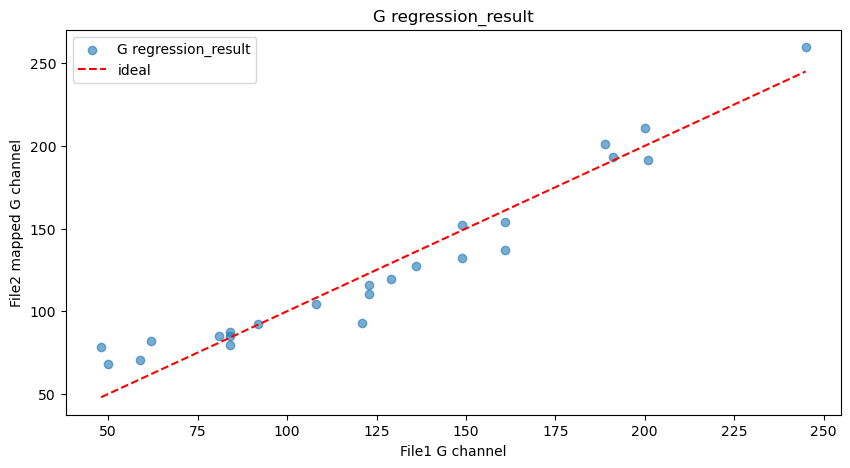

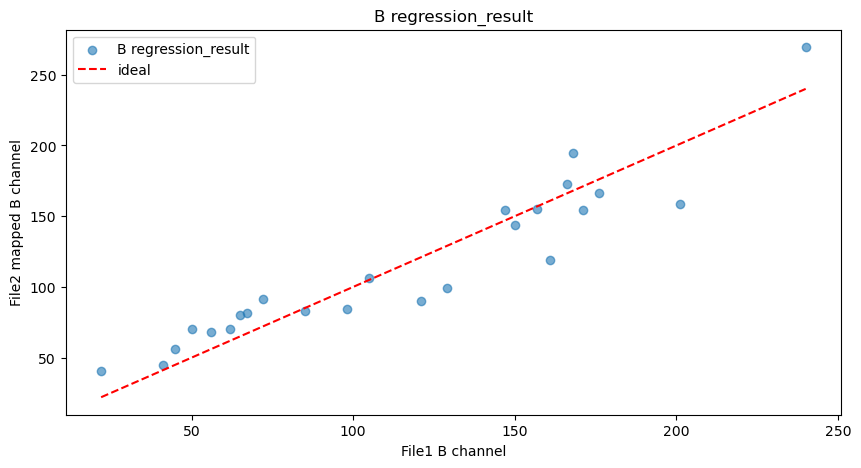

In [33]:
# 可视化拟合结果
def plot_fit_results(original, mapped, channel):
    plt.figure(figsize=(10, 5))
    plt.scatter(original, mapped, label=f'{channel} regression_result', alpha=0.6)
    plt.plot([original.min(), original.max()], [original.min(), original.max()], 'r--', label='ideal')
    plt.xlabel(f'File1 {channel} channel')
    plt.ylabel(f'File2 mapped {channel} channel')
    plt.title(f'{channel} regression_result')
    plt.legend()
    plt.show()

# 绘制 R 通道拟合结果
plot_fit_results(file1['R'], file2_mapped['R'], 'R')

# 绘制 G 通道拟合结果
plot_fit_results(file1['G'], file2_mapped['G'], 'G')

# 绘制 B 通道拟合结果
plot_fit_results(file1['B'], file2_mapped['B'], 'B')

# 应用于图像

In [34]:
img_path = "E:\\ricePhenoExt\ColorCorrection\CAHN I 13_L.jpg"

In [ ]:
from PIL import Image  # 用于加载和保存图像

# 加载图像
def load_image(image_path):
    """加载图像并转换为 RGB 格式"""
    image = Image.open(image_path).convert('RGB')
    return np.array(image)

# 映射图像颜色
def map_image_colors(image, model_R, model_G, model_B):
    """将图像的 RGB 值通过拟合函数映射"""
    # 获取图像的形状
    height, width, channels = image.shape
    
    # 将图像转换为二维数组（每个像素一行）
    pixels = image.reshape(-1, 3)
    
    # 使用拟合函数映射 R, G, B 通道
    mapped_R = model_R.predict(pixels)
    mapped_G = model_G.predict(pixels)
    mapped_B = model_B.predict(pixels)
    
    # 将映射后的值限制在 0-255 范围内
    mapped_R = np.clip(mapped_R, 0, 255).astype('uint8')
    mapped_G = np.clip(mapped_G, 0, 255).astype('uint8')
    mapped_B = np.clip(mapped_B, 0, 255).astype('uint8')
    
    # 重新组合为图像
    mapped_pixels = np.stack([mapped_R, mapped_G, mapped_B], axis=-1)
    mapped_image = mapped_pixels.reshape(height, width, channels)
    
    return mapped_image

# 保存或显示图像
def save_or_show_image(image, output_path=None):
    """保存或显示图像"""
    plt.imshow(image)
    plt.axis('off')  # 不显示坐标轴
    if output_path:
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
        print(f"图像已保存到: {output_path}")
    else:
        plt.show()

# 加载图像
image = load_image(img_path)

# 映射图像颜色
mapped_image = map_image_colors(image, model_R, model_G, model_B)

# 保存或显示结果
save_or_show_image(mapped_image)